# Tutorial on `jInv.Vis`

This tutorial explores the plotting functionalities of `jInv`. We provide minimal examples for each viewer and explain the inputs and outputs. This document can also be used as a starting point to implement new viewers. 

The general philosophy of our viewers is that we use a Cartesian coordinate system that is described by a mesh from `jInv.Mesh`. We aim at providing a consistent visualization across different mesh types.  There are different types of objects that we commonly want to visualize:

1. Image data (2D / 3D) - is assumed to be discretized in the cell-centers of the mesh
1. Meshes (2D / 3D) - we have viewers for all mesh types in `jInv`.

*Requirements: *: Our visualization package is based on [`PyPlot.jl`](https://github.com/JuliaPy/PyPlot.jl) which must be installed. 

In [1]:
using PyPlot
using jInv.Mesh
using jInv.Vis

## 2D Viewers

### `viewImage2D` - Image Data 

Example: Here we plot the functions $f(x,y) = x$ and $f(x,y) = y$ on a regular mesh. Our function, `viewImage2D` is based on `PyPlot.pcolormesh` and all keyword arguments are forward to that method.

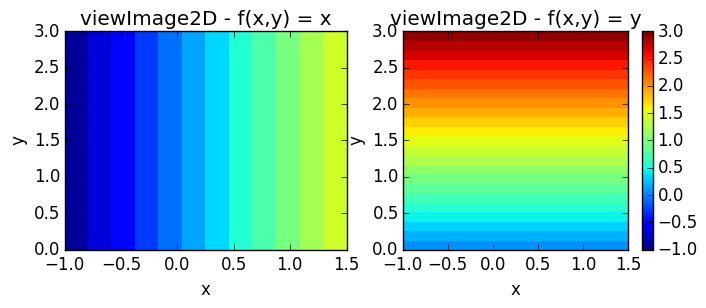

PyObject <matplotlib.text.Text object at 0x324ee1090>

In [2]:
domain = [-1 1.5 0 3]
n      = [12,23]

M    = getRegularMesh(domain,n)
xc   = getCellCenteredGrid(M)


subplot(2,2,1)
viewImage2D(xc[:,1],M,vmin=-1,vmax=3)
xlabel("x")
ylabel("y")
title("viewImage2D - f(x,y) = x")
subplot(2,2,2)
viewImage2D(xc[:,2],M,vmin=-1,vmax=3)
colorbar()
title("viewImage2D - f(x,y) = y")
xlabel("x")
ylabel("y")


### Meshes

Using `plotGrid` we can visualize regular and deformed meshes. `plotGrid` is based on `PyPlot.plot` and `PyPlot.plot3D` and as two optional arguments. 

1. `spacing` - defines the number of grid lines to skip in the visualization, default=[1,1,1]
1. `color`   - color for grid lines, default="b"

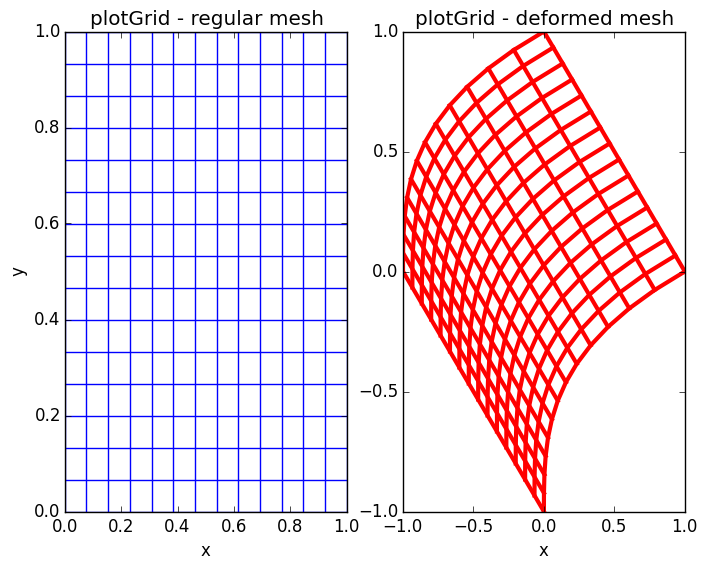

In [8]:
domain = [0 1 0 1]
n      = [13 15]
M      = getRegularMesh(domain,n)

xc     = getNodalGrid(M)
yc     = [xc[:,1].^3-xc[:,2] xc[:,2]+xc[:,1]-1]

subplot(1,2,1)
plotGrid(M)
title("plotGrid - regular mesh")
xlabel("x"); ylabel("y")
subplot(1,2,2)
plotGrid(yc,M,color="r",linewidth=3)
title("plotGrid - deformed mesh")
xlabel("x"); 

## 3D Viewers

### `viewOrthoSlice2D` - orthogonal projections of 3D image data

*Example : * Here we visualize the function $f(x,y,z)=x y z$ on  a `RegularMesh` and `TensorMesh3D`.

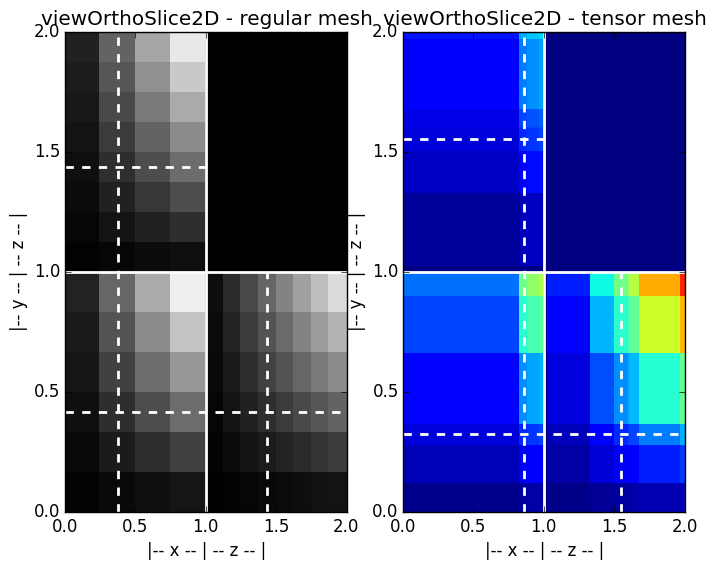

PyObject <matplotlib.text.Text object at 0x3254f1610>

In [4]:
domain = [0 1 0 1 0 1]
n  = [4 6 8]

f(XYZ) = XYZ[:,1].*XYZ[:,2].*XYZ[:,3]

# construct a regular mesh on domain and discretize function
Mreg = getRegularMesh(domain,n)
xr   = getCellCenteredGrid(Mreg)
fr   = f(xr)

# get a tensor mesh with random cell sizes on the same domain
x0 = Mreg.x0;
h1 = rand(n[1]); h1 = (domain[2]-domain[1])*h1./sum(h1)
h2 = rand(n[2]); h2 = (domain[4]-domain[3])*h2./sum(h2)
h3 = rand(n[3]); h3 = (domain[6]-domain[5])*h3./sum(h3)
Mten = getTensorMesh3D(h1,h2,h3,x0)
xt   = getCellCenteredGrid(Mten)
ft   = f(xt)

subplot(1,2,1)
viewOrthoSlices2D(fr,Mreg,axis=true,cmap="gray",vmin=0,vmax=.5*maximum(fr))
title("viewOrthoSlice2D - regular mesh")
subplot(1,2,2)
viewOrthoSlices2D(ft,Mten,axis=true)
title("viewOrthoSlice2D - tensor mesh")


### `plotGrid` for 3D Meshes

Thanks to multiple dispatch, the syntax of `plotGrid` is the same for 2D and 3D meshes. As before, we can control the spacing and the appearance through the keyword arguments of `PyPlot.plot3D`

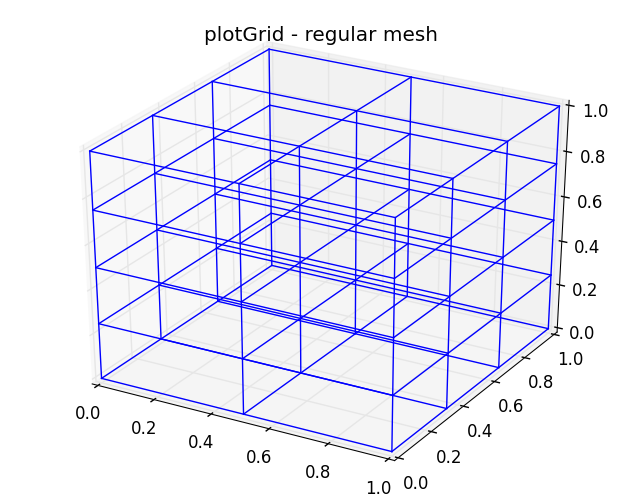

PyObject <matplotlib.text.Text object at 0x3257c6450>

In [5]:
plotGrid(Mreg,spacing=[2,2,2])
title("plotGrid - regular mesh")

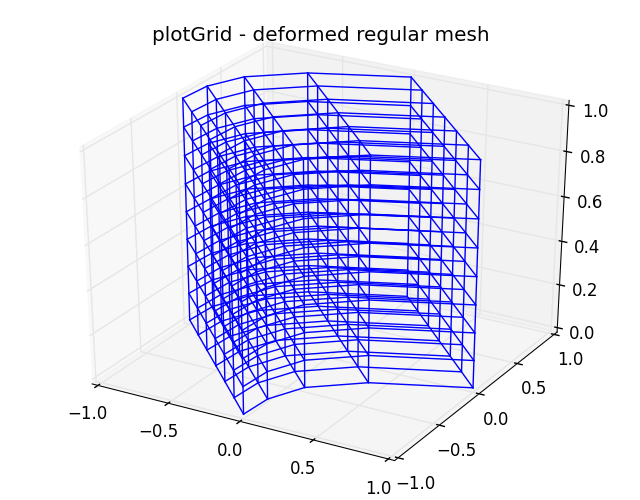

PyObject <matplotlib.text.Text object at 0x325b57950>

In [6]:
xc = getNodalGrid(Mreg)
yn = [xc[:,1].^3-xc[:,2] xc[:,2]+xc[:,1]-1 xc[:,3]]

plotGrid(yn,Mreg)
title("plotGrid - deformed regular mesh")

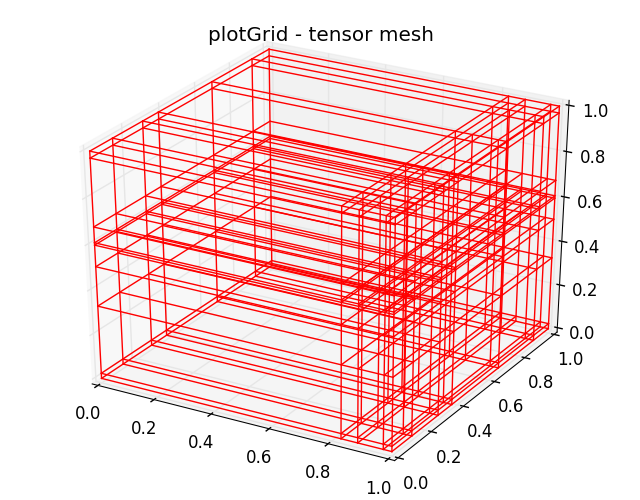

PyObject <matplotlib.text.Text object at 0x325b51ad0>

In [7]:
plotGrid(Mten,color="r")
title("plotGrid - tensor mesh")